<a href="https://colab.research.google.com/github/DaisyXinyiHe/diabetes_mellitus_predict/blob/pre_processing/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Found Feature Importance and Correlation btwn Features

## Execute if using Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Navigate to data folder

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/WiDS_2021

/content/drive/MyDrive/Colab Notebooks/WiDS_2021


## Load Library & Dataset

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
training_data = pd.read_csv('training_data_clean.csv')

In [8]:
training_data = training_data.fillna(0)

## Define dependent variable

In [10]:
# Define independent and dependent variables
y = training_data['diabetes_mellitus']
training_data = training_data.drop(columns=['diabetes_mellitus'])
# encounter_id and hospital_id should not be invluded as predictors
training_data = training_data.drop(columns=['encounter_id', 'hospital_id'])
print(y.shape)
print(training_data.shape)

(130091,)
(130091, 345)


## Explore Dataset

In [11]:
training_data

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,h1_potassium_min_0_1,h1_sodium_max_0_1,h1_sodium_min_0_1,h1_wbc_max_0_1,h1_wbc_min_0_1,d1_arterial_pco2_max_0_1,d1_arterial_pco2_min_0_1,d1_arterial_ph_max_0_1,d1_arterial_ph_min_0_1,d1_arterial_po2_max_0_1,d1_arterial_po2_min_0_1,d1_pao2fio2ratio_max_0_1,d1_pao2fio2ratio_min_0_1,h1_arterial_pco2_max_0_1,h1_arterial_pco2_min_0_1,h1_arterial_ph_max_0_1,h1_arterial_ph_min_0_1,h1_arterial_po2_max_0_1,h1_arterial_po2_min_0_1,h1_pao2fio2ratio_max_0_1,h1_pao2fio2ratio_min_0_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,0.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,0.0,0.0,0.0,0.000,36.0,134.0,39.3,0.0000,0,14.1,46.0,32.0,68.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,0,160.0,90,0.927778,0,70.2,0.0,108.0,203.01,0,0,0.0,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,35.1,0.0000,1,12.7,0.0,0.0,95.0,31.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,25.0,31.952749,0,172.7,93,0.000694,0,95.3,0.0,122.0,703.03,0,0,0.0,0.0,0.00,0.0,3.0,6.0,0.0,5.0,0.0,102.0,0.0,0,68.0,0.0,0.0,0.0,0.000,37.0,0.0,36.7,0.0000,0,0.0,0.0,0.0,88.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,81.0,22.635548,1,165.1,92,0.000694,0,61.7,0.0,203.0,1206.03,1,0,0.0,0.0,0.00,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,0.0,34.8,0.0000,1,8.0,62.0,30.0,48.0,42.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,19.0,0.000000,0,188.0,91,0.073611,0,0.0,0.0,119.0,601.01,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0,103.0,0.0,0.0,0.0,0.000,16.0,0.0,36.7,0.0000,0,0.0,0.0,0.0,99.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130086,50.0,29.287256,0,175.3,1109,0.023611,0,90.0,0.0,110.0,104.01,0,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,0.0,106.0,0.0,0,120.0,0.0,0.0,0.0,0.000,50.0,0.0,36.2,1751.1552,0,0.0,0.0,0.0,102.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
130087,79.0,29.653433,0,162.6,1106,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,0.0,4.0,6.0,0.0,4.0,139.0,112.0,39.0,0,125.0,0.0,0.0,0.0,0.000,42.0,140.0,36.4,5724.7776,0,9.5,0.0,0.0,97.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
130088,73.0,32.265371,0,177.8,1104

In [12]:
# How many people are diagnosed with diabete in our dataset?
from collections import Counter
print(Counter(y))


Counter({0: 101945, 1: 28146})


We have more diagnosed patients than undiagnosed patients. 

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size = 0.2, random_state = 42)

# Fitting a general logistics regression without checking correlation

In [19]:
print(X_train.shape)
print(y_train.shape)

(104072, 345)
(104072,)


In [20]:
from sklearn.linear_model import LogisticRegression
# log reg at sklearn is default to have a regulatory factor "l2"
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Accuracy = {accuracy_score(y_test, pred_logreg)}')
print(f'F1 = {f1_score(y_test, pred_logreg,average = None)}')
print(f'Precision = {precision_score(y_test,pred_logreg,average=None)}')
print(f'Recall = {recall_score(y_test, pred_logreg,average = None)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_logreg))

Accuracy = 0.8069487682078481
F1 = [0.88579159 0.37656696]
Precision = [0.82664234 0.61792261]
Recall = [0.95405789 0.27079614]
Confusion matrix =
[[19479   938]
 [ 4085  1517]]


# Fitting a general random forest without checking correlation

In [26]:
from sklearn.ensemble import RandomForestClassifier
# random forest classification default: n = 100, criterion='gini'(gini index for feature importance),max_depth = None
logRF = RandomForestClassifier( random_state=42)
logRF.fit(X_train, y_train)
pred_RF = logRF.predict(X_test)

In [27]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Accuracy = {accuracy_score(y_test, pred_RF)}')
print(f'F1 = {f1_score(y_test, pred_RF,average = None)}')
print(f'Precision = {precision_score(y_test,pred_RF,average=None)}')
print(f'Recall = {recall_score(y_test, pred_RF,average = None)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_RF))

Accuracy = 0.8176717014489412
F1 = [0.89166476 0.42483026]
Precision = [0.83528002 0.66213152]
Recall = [0.95621296 0.31274545]
Confusion matrix =
[[19523   894]
 [ 3850  1752]]


Results from the sample random forest and the logistic regression is very similar

# Logistics regression correlation

In [33]:
# Check each feature's importance by checking their coefficiences
logreg_coef = logreg.coef_[0]
feature_num = list(range(0,len(logreg_coef)))
feature_name = list(X_train.columns)
feature_coef = pd.DataFrame({'num': feature_num, 'name':feature_name,'coef' : abs(logreg_coef)})
print(feature_coef.sort_values(by='coef', ascending = False))

     num                name          coef
7      7              weight  1.110633e-02
98    98      d1_glucose_max  1.068035e-02
52    52         d1_spo2_max  9.087395e-03
42    42    d1_heartrate_max  7.082040e-03
0      0                 age  6.804518e-03
..   ...                 ...           ...
306  306   h1_sodium_max_0_1  1.114722e-06
287  287  h1_calcium_min_0_1  5.452201e-07
286  286  h1_calcium_max_0_1  5.452201e-07
22    22   heart_rate_apache  4.364078e-07
6      6  readmission_status  0.000000e+00

[345 rows x 3 columns]


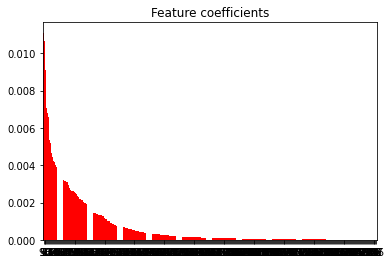

In [37]:
# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
indices = np.argsort(feature_coef.coef)[::-1]
plt.figure()
plt.title("Feature coefficients")
plt.bar(range(X_train.shape[1]), feature_coef.coef[indices],
        color="r",  align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

It is very hard to see which feature is good because there are too many features! Maybe we don't need this much features. 

Limit the features to having correlation over 0.003

     num                       name      coef
0      0                        age  0.006805
1      1                        bmi  0.005210
3      3                     height  0.006583
7      7                     weight  0.011106
30    30            resprate_apache  0.003577
35    35                 wbc_apache  0.003180
36    36     d1_diasbp_invasive_max  0.004417
38    38              d1_diasbp_max  0.003686
42    42           d1_heartrate_max  0.007082
51    51            d1_resprate_min  0.004251
52    52                d1_spo2_max  0.009087
53    53                d1_spo2_min  0.003639
60    60                d1_temp_max  0.003604
61    61                d1_temp_min  0.003185
64    64              h1_diasbp_max  0.003135
65    65              h1_diasbp_min  0.003897
67    67  h1_diasbp_noninvasive_min  0.003405
77    77            h1_resprate_min  0.003117
80    80      h1_sysbp_invasive_max  0.003075
93    93                 d1_bun_min  0.004176
98    98             d1_glucose_ma

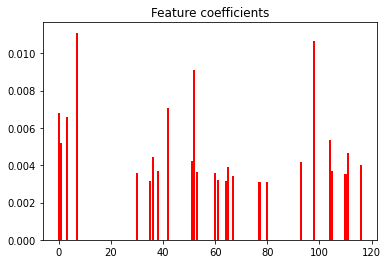

In [72]:
# Extract the indices corresponding to a coefficient > 0.003
print(feature_coef[feature_coef.coef >= 0.003])

indices = feature_coef.coef[feature_coef.coef >= 0.003].index
plt.figure()
plt.title("Feature coefficients")
plt.bar( indices, feature_coef.coef[indices], color="r",  align="center")

plt.show()

# Random Forest Feature Importance

## Get Feature Correlation Matrix Heatmap

In [ ]:
corr_matrix = training_data.corr()
print(corr_matrix)

                            age       bmi  ...  icu_type_Neuro ICU  icu_type_SICU
age                    1.000000  0.002124  ...           -0.021473      -0.011343
bmi                    0.002124  1.000000  ...           -0.013876      -0.003955
elective_surgery       0.068532  0.019309  ...            0.032798       0.108879
height                 0.000501  0.306554  ...           -0.002070       0.019056
icu_id                -0.023397  0.051856  ...           -0.003723       0.070685
...                         ...       ...  ...                 ...            ...
icu_type_Cardiac ICU   0.004651  0.007186  ...           -0.077345      -0.067843
icu_type_MICU         -0.002650  0.012838  ...           -0.089920      -0.078872
icu_type_Med-Surg ICU -0.032792 -0.010021  ...           -0.327416      -0.287189
icu_type_Neuro ICU    -0.021473 -0.013876  ...            1.000000      -0.077236
icu_type_SICU         -0.011343 -0.003955  ...           -0.077236       1.000000

[345 rows x 345

In [ ]:
corr_matrix[(corr_matrix>=0.5)]


,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,h1_potassium_min_0_1,h1_sodium_max_0_1,h1_sodium_min_0_1,h1_wbc_max_0_1,h1_wbc_min_0_1,d1_arterial_pco2_max_0_1,d1_arterial_pco2_min_0_1,d1_arterial_ph_max_0_1,d1_arterial_ph_min_0_1,d1_arterial_po2_max_0_1,d1_arterial_po2_min_0_1,d1_pao2fio2ratio_max_0_1,d1_pao2fio2ratio_min_0_1,h1_arterial_pco2_max_0_1,h1_arterial_pco2_min_0_1,h1_arterial_ph_max_0_1,h1_arterial_ph_min_0_1,h1_arterial_po2_max_0_1,h1_arterial_po2_min_0_1,h1_pao2fio2ratio_max_0_1,h1_pao2fio2ratio_min_0_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.872063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elective_surgery,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780027,0.909581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icu_id,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icu_type_Cardiac ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
icu_type_MICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Define high correlation as having a correlation higher than 0.5 (?)
row, col = np.where((abs(corr_matrix)>=0.5))

# Logistic Regression vs. Random Forest

# Feature Importance